<a href="https://colab.research.google.com/github/jijan67/Crop-Recommendation-System-Using-CatBoost-Classifier-Model/blob/main/Crop_Recommendation_Using_Machine_Learning_Model_(Cat_Boost)_with_99_55_Accuracy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')


In [ ]:
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


In [ ]:
# Prepare data
x = df.drop('label', axis=1)
y = df['label']


In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)


In [ ]:
# Initialize CatBoost classifier
catboost_model = CatBoostClassifier()


In [ ]:
# Train the model
catboost_model.fit(x_train, y_train)


Learning rate set to 0.081932
0:	learn: 2.6239611	total: 80.5ms	remaining: 1m 20s
1:	learn: 2.2025215	total: 106ms	remaining: 53.1s
2:	learn: 1.9216446	total: 133ms	remaining: 44.1s
3:	learn: 1.7134867	total: 159ms	remaining: 39.5s
4:	learn: 1.5338604	total: 185ms	remaining: 36.7s
5:	learn: 1.4006502	total: 214ms	remaining: 35.4s
6:	learn: 1.2654125	total: 241ms	remaining: 34.2s
7:	learn: 1.1598299	total: 268ms	remaining: 33.2s
8:	learn: 1.0629726	total: 295ms	remaining: 32.5s
9:	learn: 0.9890190	total: 321ms	remaining: 31.8s
10:	learn: 0.9165771	total: 347ms	remaining: 31.2s
11:	learn: 0.8534130	total: 378ms	remaining: 31.1s
12:	learn: 0.7907767	total: 406ms	remaining: 30.8s
13:	learn: 0.7361064	total: 435ms	remaining: 30.7s
14:	learn: 0.6848506	total: 462ms	remaining: 30.3s
15:	learn: 0.6427356	total: 494ms	remaining: 30.4s
16:	learn: 0.6053535	total: 527ms	remaining: 30.4s
17:	learn: 0.5734860	total: 559ms	remaining: 30.5s
18:	learn: 0.5417106	total: 585ms	remaining: 30.2s
19:	learn

In [ ]:
# Evaluate on test data
test_accuracy = catboost_model.score(x_test, y_test)
print("Accuracy: {:.4f}".format(test_accuracy))


Accuracy: 0.9955


In [ ]:
# Get predicted labels
y_pred = catboost_model.predict(x_test)


In [ ]:
# Generate classification report
class_labels = le.classes_
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         9
      banana       1.00      1.00      1.00         5
   blackgram       1.00      1.00      1.00         7
    chickpea       1.00      1.00      1.00        11
     coconut       1.00      1.00      1.00         9
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        13
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         8
 kidneybeans       1.00      1.00      1.00        12
      lentil       1.00      0.91      0.95        11
       maize       1.00      1.00      1.00         7
       mango       1.00      1.00      1.00        12
   mothbeans       0.93      1.00      0.97        14
    mungbean       1.00      1.00      1.00        12
   muskmelon       1.00      1.00      1.00         5
      orange       1.00      1.00      1.00         8
    

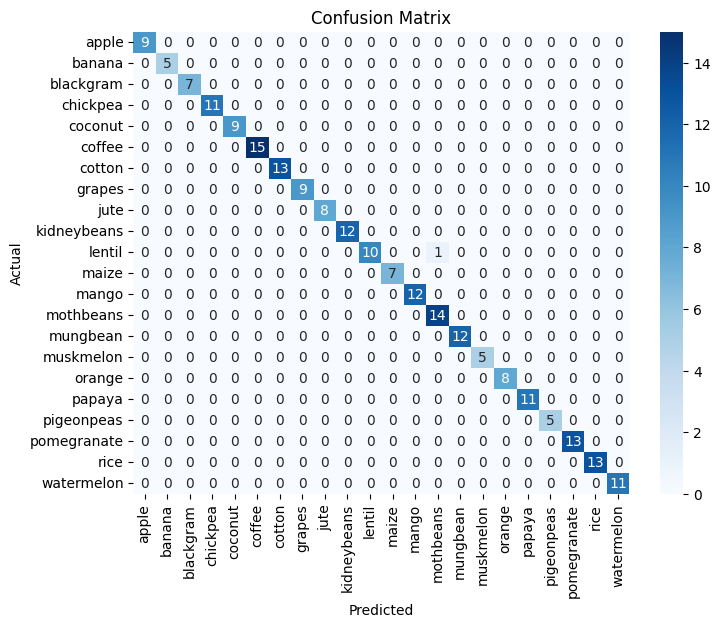

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

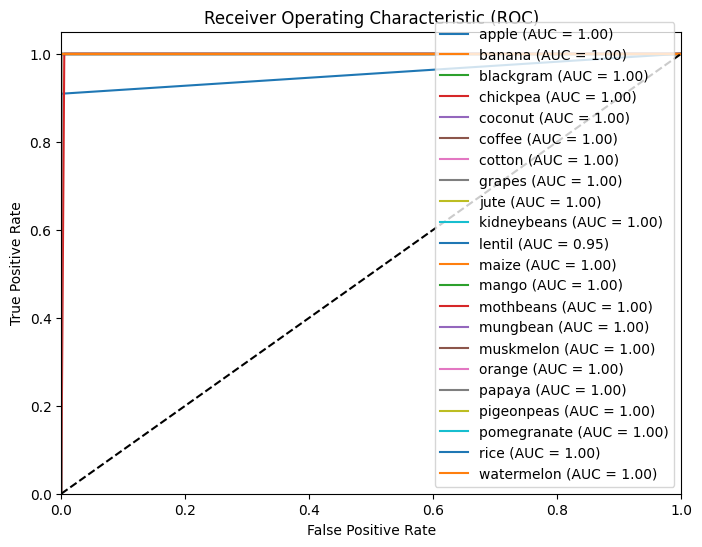

In [ ]:
# Generate ROC curve and calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), (y_pred == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=class_labels[i] + ' (AUC = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the model
import pickle

with open('catboost_model.pickle', 'wb') as file:
    pickle.dump(catboost_model, file)

In [ ]:
test_series = pd.Series({
    'N': 90,
    'P': 42,
    'K': 43,
    'temperature': 25,
    'humidity': 86,
    'ph': 6.5,
    'rainfall': 220
})

In [ ]:
# Use the trained model to predict the recommended crop
output = catboost_model.predict([test_series])[0]
print("Recommended Crop:", class_labels[output])

Recommended Crop: ['rice']
